In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Colab\ Notebooks/Minor\ Project\ Sem\ 6/

/content/drive/MyDrive/Colab Notebooks/Minor Project Sem 6


In [3]:
!ls

duc2002finaldataset_0.csv  main.ipynb  Untitled


In [4]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from ast import literal_eval # to convert array string to array

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
df = pd.read_csv('duc2002finaldataset_0.csv')
df.drop('Summary', axis=1, inplace=True)
df.head()

,Article
0,"['On the day of the Big Event, Ladbroke, the l..."
1,"[""Australian novelist Peter Carey was awarded ..."
2,"[""Six novels have been nominated for the Booke..."
3,"[""Japanese writer Kazuo Ishiguro won the 1989 ..."
4,"[""The Booker Prize is Britain's literary event..."


In [7]:
array = literal_eval(df['Article'][1])
# array

# Features extraction from first article

In [8]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-06 16:52:39.653399: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


# Finding similarity between sentances

In [9]:
import spacy
nlp = spacy.load("en_core_web_lg")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [10]:
w1 = "red"
w2 = "yellow"

w1 = nlp.vocab[w1]
w2 = nlp.vocab[w2]

In [11]:
w1.similarity(w2)

0.8282849192619324

In [12]:
array[:2]

["Australian novelist Peter Carey was awarded the coveted Booker Prize for fiction Tuesday night for his love story, ``Oscar and Lucinda.''",
 "A panel of five judges unanimously announced the award of the $26,250 prize after an 80-minute deliberation during a banquet at London's ancient Guildhall."]

In [13]:
s1 = nlp(array[0])
s2 = nlp(array[1])

s1.similarity(s2)

0.5956792954525141

In [14]:
s1, type(s1)

(Australian novelist Peter Carey was awarded the coveted Booker Prize for fiction Tuesday night for his love story, ``Oscar and Lucinda.'',
 spacy.tokens.doc.Doc)

In [15]:
# Tokenize all sentences in the article
# sentences = []
# for sentence in array:
#     sentences.append(word_tokenize(sentence))

# sentences

In [16]:
# sentences[0]

In [17]:
# Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = set(stopwords.words('english'))
# filtered_article = [w for w in sentences[0] if w not in stop_words and len(w) > 2]
# filtered_article

In [19]:
for token in s1:
  print(token, " | ", token.pos_, " | ", token.lemma_, " | ", spacy.explain(token.pos_))

Australian  |  ADJ  |  australian  |  adjective
novelist  |  NOUN  |  novelist  |  noun
Peter  |  PROPN  |  Peter  |  proper noun
Carey  |  PROPN  |  Carey  |  proper noun
was  |  AUX  |  be  |  auxiliary
awarded  |  VERB  |  award  |  verb
the  |  DET  |  the  |  determiner
coveted  |  ADJ  |  coveted  |  adjective
Booker  |  PROPN  |  Booker  |  proper noun
Prize  |  PROPN  |  Prize  |  proper noun
for  |  ADP  |  for  |  adposition
fiction  |  NOUN  |  fiction  |  noun
Tuesday  |  PROPN  |  Tuesday  |  proper noun
night  |  NOUN  |  night  |  noun
for  |  ADP  |  for  |  adposition
his  |  PRON  |  his  |  pronoun
love  |  NOUN  |  love  |  noun
story  |  NOUN  |  story  |  noun
,  |  PUNCT  |  ,  |  punctuation
`  |  PUNCT  |  `  |  punctuation
`  |  PUNCT  |  `  |  punctuation
Oscar  |  PROPN  |  Oscar  |  proper noun
and  |  CCONJ  |  and  |  coordinating conjunction
Lucinda  |  PROPN  |  Lucinda  |  proper noun
.  |  PUNCT  |  .  |  punctuation
''  |  PUNCT  |  ''  |  punctuatio

In [20]:
for ent in s1.ents:
  print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Australian  |  NORP  |  Nationalities or religious or political groups
Peter Carey  |  PERSON  |  People, including fictional
Booker Prize  |  WORK_OF_ART  |  Titles of books, songs, etc.
Tuesday night  |  TIME  |  Times smaller than a day
Oscar  |  WORK_OF_ART  |  Titles of books, songs, etc.
Lucinda  |  PERSON  |  People, including fictional


In [21]:
from spacy import displacy
displacy.render(s1, style="ent", jupyter=True)

# Cue Phrases extraction

In [22]:
def ner_for_sentence(sentence:str):
  phrases = []
  tokens = nlp(sentence)

  for ent in tokens.ents:
    phrases.append(ent.text)
  
  return phrases

ner_for_sentence(array[0])

['Australian',
 'Peter Carey',
 'Booker Prize',
 'Tuesday night',
 'Oscar',
 'Lucinda']

In [23]:
def cue_phrases_feature(article):
  cue_phrases = []
  for sentence in article:
    tokens = nlp(sentence)
    cue_phrases.append(len(tokens.ents))
  cue_phrases = np.array(cue_phrases)
  max_cue_phrases = max(cue_phrases)
  cue_phrases = cue_phrases / max_cue_phrases
  return cue_phrases

cue_phrases_feature(array) # for each sentence in the article array

array([0.85714286, 0.71428571, 0.42857143, 0.42857143, 0.        ,
       0.42857143, 0.28571429, 0.        , 0.28571429, 0.57142857,
       0.42857143, 0.71428571, 0.        , 0.42857143, 1.        ,
       0.28571429, 0.42857143, 0.28571429])

In [24]:
import nltk
from nltk.util import ngrams

text = "By the way , let's discuss the meeting. On a related note, I want to bring up the budget."

cue_phrases = ["by the way", "on a related note", "let me add", "incidentally", "to change the subject", "speaking of which"]

bigrams = ngrams(text.lower().split(), 3)
bigrams = list(bigrams)

for bigram in bigrams:
  if " ".join(bigram) in cue_phrases:
      print("Cue phrase found:", " ".join(bigram))


Cue phrase found: by the way


# Open relation - DONE

Remove all stopwords and calculate length ratio in all sentences

In [ ]:
word_tokens = word_tokenize(array[0])
[word for word in word_tokens if word.lower() not in stopwords.words('english') and len(word)>1]

['Australian',
 'novelist',
 'Peter',
 'Carey',
 'awarded',
 'coveted',
 'Booker',
 'Prize',
 'fiction',
 'Tuesday',
 'night',
 'love',
 'story',
 '``',
 'Oscar',
 'Lucinda',
 "''"]

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def open_relation(article):
  length = []
  for sentence in article:
    word_tokens = word_tokenize(sentence)
    filtered_words = [word for word in word_tokens if word.lower() not in stopwords.words('english') and len(word)>1]
    length.append(len(filtered_words))
  length = np.array(length)
  max_len = max(length)
  length = length / max_len
  return length


open_relation(array) # for each sentence in the article array

array([0.68, 0.6 , 0.48, 0.68, 0.6 , 0.44, 0.76, 0.36, 0.32, 0.56, 0.32,
       1.  , 0.4 , 0.16, 0.8 , 0.28, 0.2 , 0.52])

# Lexical similarity

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet as wn
wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

# TF-ISF - DONE

In [29]:
import re
from math import log2

In [30]:
def tf(t, article):
  return len(re.findall(t, ".".join(article)))

tf('Australian', array)

3

In [31]:
def sf(t, article):
  return len([sentence for sentence in article if t in sentence])

def isf(t, article):
  return log2(len(article)/sf(t, article))

In [32]:
isf('Australian', array)

2.584962500721156

In [33]:
def tf_isf(article):
  mat = []
  for sen in article:
    vec = []
    for word in sen:
      vec.append(isf(word, article))
    print(vec)
    mat.append(vec)
  return mat

In [34]:
tf_isf_mat = tf_isf(array)

[1.84799690655495, 0.2630344058337938, 0.0, 0.0, 0.0, 0.0, 0.16992500144231237, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4694852833012202, 0.0, 0.16992500144231237, 0.0, 0.0, 0.0, 0.0, 2.169925001442312, 0.0, 0.0, 0.0, 0.0, 0.0, 1.584962500721156, 0.0, 0.0, 0.0, 0.16992500144231237, 0.0, 0.08246216019197297, 0.0, 0.0, 0.0, 0.0, 0.08246216019197297, 0.0, 0.0, 0.2630344058337938, 0.0, 0.2630344058337938, 0.0, 0.0, 0.08246216019197297, 0.0, 0.0, 0.4694852833012202, 0.0, 0.4694852833012202, 0.0, 0.0, 0.0, 0.2630344058337938, 0.0, 1.3625700793847084, 0.0, 0.0, 0.7104933828050152, 0.0, 0.0, 0.0, 2.169925001442312, 0.0, 0.0, 1.84799690655495, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4694852833012202, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3625700793847084, 0.2630344058337938, 0.0, 0.0, 0.2630344058337938, 0.0, 0.16992500144231237, 0.0, 0.0, 0.0, 0.2630344058337938, 0.08246216019197297, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08246216019197297, 0.0, 0.0, 0.0, 0.16992500144231237, 0.0, 0.4694852833012202, 0.0, 0.0, 0.0, 0

# Cosine similarity

## Cosine similarity between two sentences using words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sw contains the list of stopwords
sw = stopwords.words('english') 
l1 =[];l2 =[]
  
# remove stop words from the string
X_set = {w for w in array[0] if not w in sw} 
Y_set = {w for w in array[1] if not w in sw}

# form a set containing keywords of both strings 
rvector = X_set.union(Y_set) 
for w in rvector:
    if w in X_set: l1.append(1) # create a vector
    else: l1.append(0)
    if w in Y_set: l2.append(1)
    else: l2.append(0)
c = 0
  
# cosine formula 
for i in range(len(rvector)):
        c+= l1[i]*l2[i]
cosine = c / float((sum(l1)*sum(l2))**0.5)
print("similarity: ", cosine)

[nltk_data] Downloading package stopwords to /root/nltk_data...


similarity:  0.6572670690061994


[nltk_data]   Unzipping corpora/stopwords.zip.


## Cosine similarity function on word basis - DONE

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(article):
  filtered_article = []
  for sen in article:
    words = word_tokenize(sen)
    filtered_article.append({w for w in words if not w in sw})
    # print(filtered_article[-1])
  return filtered_article

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# array

In [ ]:
filtered_article = remove_stopwords(array)

In [ ]:
from numpy.linalg import norm

# Using words similarity
def cosine_similarity_m1(article):
  mat = []
  filtered_article = remove_stopwords(article)

  for X_set in filtered_article:
    vec = [] # similarity vector for sentence x with all other sentences (y)
    for Y_set in filtered_article:
      rvector = X_set.union(Y_set) 
      l1, l2 = [], []
      # to get the paddings
      for w in rvector:
        if w in X_set: l1.append(1) # create a vector
        else: l1.append(0)
        if w in Y_set: l2.append(1)
        else: l2.append(0)
      # find the similarity between l1 and l2
      similarity = np.dot(l1, l2)/(norm(l1)*norm(l2))
      vec.append(similarity)
    # print(vec)
    mat.append(vec)
  return mat

In [ ]:
# using tf isf
def cosine_similarity(article):
  pass

In [ ]:
cosine_similarity_mat = cosine_similarity(array)

In [ ]:
for i in cosine_similarity_mat:
  print(i)

[0.9999999999999998, 0.05407380704358752, 0.061313933948496574, 0.16222142113076254, 0.21052631578947364, 0.2452557357939863, 0.21052631578947364, 0.27668578554642986, 0.07254762501100116, 0.11470786693528087, 0.21764287503300347, 0.17660431427533915, 0.2545139051903111, 0.2051956704170308, 0.09567297464698797, 0.16222142113076252, 0.3468439878096479, 0.1720618004029213]
[0.05407380704358752, 1.0000000000000002, 0.12598815766974242, 0.11111111111111113, 0.05407380704358752, 0.12598815766974242, 0.16222142113076254, 0.07106690545187015, 0.14907119849998599, 0.11785113019775793, 0.07453559924999299, 0.09072184232530289, 0.06537204504606135, 0.10540925533894598, 0.049147318718299055, 0.08333333333333333, 0.0890870806374748, 0.05892556509887897]
[0.061313933948496574, 0.12598815766974242, 1.0, 0.06299407883487121, 0.061313933948496574, 0.07142857142857142, 0.061313933948496574, 0.16116459280507606, 0.1690308509457033, 0.0668153104781061, 0.1690308509457033, 0.10286889997472794, 0.148249863

# Cosine similarity using tf-isf

In [27]:
from keras.metrics import CosineSimilarity
from keras_preprocessing.sequence import pad_sequences

In [35]:
# Pad vectors to have the same length
padded_vectors = pad_sequences(tf_isf_mat, padding='post', value=0.0)


In [36]:
# Create a cosine similarity metric
cos_sim = CosineSimilarity(axis=1)


In [38]:
# Compute cosine similarity between each pair of vectors
similarities = cos_sim(padded_vectors, padded_vectors)
print(similarities)

tf.Tensor(0.9999999, shape=(), dtype=float32)


In [ ]:
# Compute cosine similarity between each pair of vectors
cos_sim_result = []
for i in range(padded_vectors.shape[0]):
  cos_sim_row = []
  for j in range(padded_vectors.shape[0]):
    cos_sim_row.append(cos_sim(padded_vectors[i:i+1], padded_vectors[j:j+1]))
  cos_sim_result.append(cos_sim_row)

for i in cos_sim_result:
  print(i)

# Aggregation Similarity - DONE

---



In [ ]:
def aggregation_similarity(article):
  cosine_similarity_mat = cosine_similarity(article)

  return [sum(i) for i in cosine_similarity_mat]

In [ ]:
aggregation_similarity_mat = aggregation_similarity(array)

In [ ]:
print(aggregation_similarity_mat)

[4.038615755894496, 2.5879777355664375, 3.0171348480799898, 3.1468786214278572, 3.3901190782251254, 4.054696062237218, 3.237980454132042, 4.187749001728495, 3.224453897094861, 2.599747109039405, 3.070583118944791, 3.3891008076123175, 4.201560840132413, 3.823274294050974, 2.725073681047376, 3.4287363465670317, 3.5148626148726585, 3.1834660856108217]


# Bushy path - DONE

In [ ]:
bushy_path_mat = cosine_similarity(array)
edge_list = []
for i in range(len(bushy_path_mat)):
  for j in range(i, len(bushy_path_mat[i])):
    if bushy_path_mat[i][j] <= 0.5:
      edge_list.append([i, j])
    else:
      bushy_path_mat[i][j] = 0
# edge_list

In [ ]:
len(array), len(bushy_path_mat), len(bushy_path_mat[0])

(18, 18, 18)

In [ ]:
for i in bushy_path_mat:
  print(i)

[0, 0.05407380704358752, 0.061313933948496574, 0.16222142113076254, 0.21052631578947364, 0.2452557357939863, 0.21052631578947364, 0.27668578554642986, 0.07254762501100116, 0.11470786693528087, 0.21764287503300347, 0.17660431427533915, 0.2545139051903111, 0.2051956704170308, 0.09567297464698797, 0.16222142113076252, 0.3468439878096479, 0.1720618004029213]
[0.05407380704358752, 0, 0.12598815766974242, 0.11111111111111113, 0.05407380704358752, 0.12598815766974242, 0.16222142113076254, 0.07106690545187015, 0.14907119849998599, 0.11785113019775793, 0.07453559924999299, 0.09072184232530289, 0.06537204504606135, 0.10540925533894598, 0.049147318718299055, 0.08333333333333333, 0.0890870806374748, 0.05892556509887897]
[0.061313933948496574, 0.12598815766974242, 0, 0.06299407883487121, 0.061313933948496574, 0.07142857142857142, 0.061313933948496574, 0.16116459280507606, 0.1690308509457033, 0.0668153104781061, 0.1690308509457033, 0.10286889997472794, 0.14824986333222026, 0.11952286093343936, 0.111

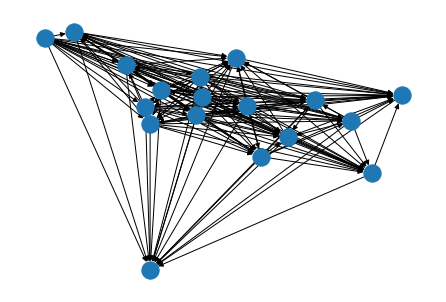

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph(edge_list):
    G = nx.DiGraph(edge_list)
    nx.draw(G)

show_graph(edge_list)

In [ ]:
bushy_score = [0]*len(array)
for i, j in edge_list:
  bushy_score[i]+=1
  bushy_score[j]+=1

bushy_score

[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]